In [1]:
pip install ffmpeg-python av

Note: you may need to restart the kernel to use updated packages.


In [2]:
import av

# Path to the video file
video_path = 'C:/Users/yogi2/Desktop/IVA ASSIGNMENT-2/Demon.mp4'

# Open the video file
container = av.open(video_path)

# Initialize a frame counter
frame_count = 0

# Iterate over frames in the video
for frame in container.decode(video=0):
    # Increment the frame counter
    frame_count += 1
    # Print frame information
    print(f"Frame: {frame_count}, PTS: {frame.pts}, Time: {frame.time}, Width: {frame.width}, Height: {frame.height}")


Frame: 1, PTS: 0, Time: 0.0, Width: 1934, Height: 892
Frame: 2, PTS: 1350, Time: 0.015, Width: 1934, Height: 892
Frame: 3, PTS: 2700, Time: 0.03, Width: 1934, Height: 892
Frame: 4, PTS: 4050, Time: 0.045, Width: 1934, Height: 892
Frame: 5, PTS: 5490, Time: 0.061, Width: 1934, Height: 892
Frame: 6, PTS: 6840, Time: 0.076, Width: 1934, Height: 892
Frame: 7, PTS: 8190, Time: 0.091, Width: 1934, Height: 892
Frame: 8, PTS: 9540, Time: 0.106, Width: 1934, Height: 892
Frame: 9, PTS: 10890, Time: 0.121, Width: 1934, Height: 892
Frame: 10, PTS: 12240, Time: 0.136, Width: 1934, Height: 892
Frame: 11, PTS: 13680, Time: 0.152, Width: 1934, Height: 892
Frame: 12, PTS: 15030, Time: 0.167, Width: 1934, Height: 892
Frame: 13, PTS: 16380, Time: 0.182, Width: 1934, Height: 892
Frame: 14, PTS: 17730, Time: 0.197, Width: 1934, Height: 892
Frame: 15, PTS: 19080, Time: 0.212, Width: 1934, Height: 892
Frame: 16, PTS: 20430, Time: 0.227, Width: 1934, Height: 892
Frame: 17, PTS: 21780, Time: 0.242, Width: 1934

Total frames: 727
I-frames: 12 (1.65%)
P-frames: 715 (98.35%)
B-frames: 0 (0.00%)


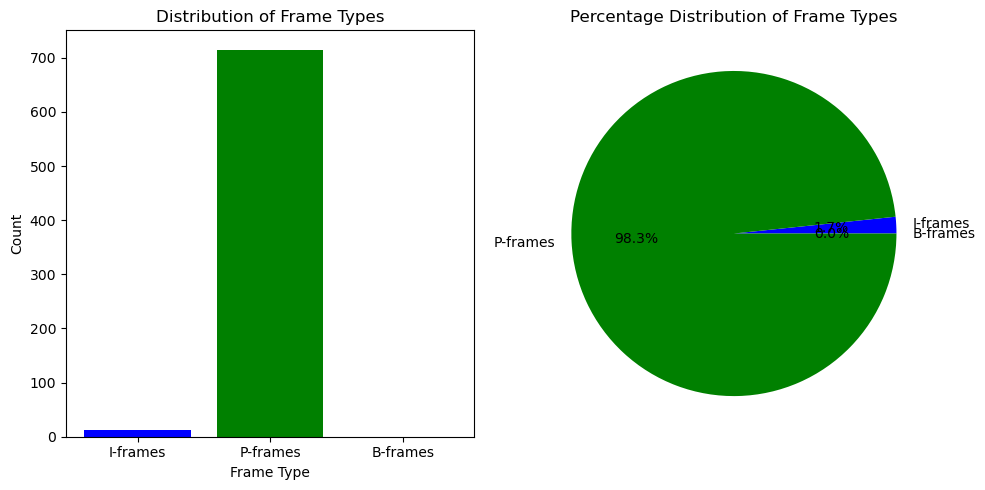

In [3]:
import matplotlib.pyplot as plt

# Path to the video file
video_path = 'C:/Users/yogi2/Desktop/IVA ASSIGNMENT-2/Demon.mp4'

# Open the video file
container = av.open(video_path)

# Counters for frame types
i_frame_count = 0
p_frame_count = 0
b_frame_count = 0

# Total frames counter
total_frames = 0

# Iterate over frames in the video
for frame in container.decode(video=0):
    total_frames += 1
    if frame.pict_type == 'I':
        i_frame_count += 1
    elif frame.pict_type == 'P':
        p_frame_count += 1
    elif frame.pict_type == 'B':
        b_frame_count += 1

# Calculate percentages
i_frame_percentage = (i_frame_count / total_frames) * 100
p_frame_percentage = (p_frame_count / total_frames) * 100
b_frame_percentage = (b_frame_count / total_frames) * 100

# Print results
print(f"Total frames: {total_frames}")
print(f"I-frames: {i_frame_count} ({i_frame_percentage:.2f}%)")
print(f"P-frames: {p_frame_count} ({p_frame_percentage:.2f}%)")
print(f"B-frames: {b_frame_count} ({b_frame_percentage:.2f}%)")

# Plotting the distribution
frame_types = ['I-frames', 'P-frames', 'B-frames']
counts = [i_frame_count, p_frame_count, b_frame_count]

plt.figure(figsize=(10, 5))

# Bar chart
plt.subplot(1, 2, 1)
plt.bar(frame_types, counts, color=['blue', 'green', 'red'])
plt.title('Distribution of Frame Types')
plt.xlabel('Frame Type')
plt.ylabel('Count')

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(counts, labels=frame_types, autopct='%1.1f%%', colors=['blue', 'green', 'red'])
plt.title('Percentage Distribution of Frame Types')

plt.tight_layout()
plt.show()


In [4]:
import ffmpeg
import av
import os

# Path to the video file
video_path = 'C:/Users/yogi2/Desktop/IVA ASSIGNMENT-2/Demon.mp4'
output_dir = 'extracted_frames'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Open the video file
container = av.open(video_path)

# Iterate over frames in the video
frame_counter = 0
for frame in container.decode(video=0):
    # Define the frame type
    frame_type = frame.pict_type
    frame_counter += 1
    # Save frames as image files
    output_filename = os.path.join(output_dir, f"{frame_counter}_{frame_type}.png")
    frame.to_image().save(output_filename)

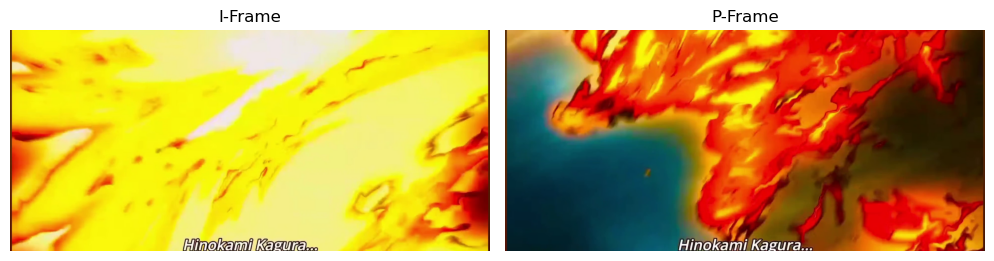

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the first few frames of each type (I, P, B)
frame_filenames = sorted(os.listdir(output_dir))

plt.figure(figsize=(15, 5))

# Display the first I-frame
i_frame_path = next((os.path.join(output_dir, f) for f in frame_filenames if 'I' in f), None)
if i_frame_path:
    img = Image.open(i_frame_path)
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("I-Frame")
    plt.axis('off')

# Display the first P-frame
p_frame_path = next((os.path.join(output_dir, f) for f in frame_filenames if 'P' in f), None)
if p_frame_path:
    img = Image.open(p_frame_path)
    plt.subplot(1, 3, 2)
    plt.imshow(img)
    plt.title("P-Frame")
    plt.axis('off')

# Display the first B-frame
b_frame_path = next((os.path.join(output_dir, f) for f in frame_filenames if 'B' in f), None)
if b_frame_path:
    img = Image.open(b_frame_path)
    plt.subplot(1, 3, 3)
    plt.imshow(img)
    plt.title("B-Frame")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [8]:
import os

# Path to the directory containing the extracted frames
output_dir = 'extracted_frames'

# Initialize counters and size accumulators
i_frame_sizes = []
p_frame_sizes = []
b_frame_sizes = []

# Calculate the file sizes for each frame type
for filename in os.listdir(output_dir):
    filepath = os.path.join(output_dir, filename)
    file_size = os.path.getsize(filepath)

    if 'I' in filename:
        i_frame_sizes.append(file_size)
    elif 'P' in filename:
        p_frame_sizes.append(file_size)
    elif 'B' in filename:
        b_frame_sizes.append(file_size)

# Calculate average file sizes
average_i_frame_size = sum(i_frame_sizes) / len(i_frame_sizes) if i_frame_sizes else 0
average_p_frame_size = sum(p_frame_sizes) / len(p_frame_sizes) if p_frame_sizes else 0
average_b_frame_size = sum(b_frame_sizes) / len(b_frame_sizes) if b_frame_sizes else 0

# Print results
print(f"Average I-Frame size: {average_i_frame_size:.2f} bytes")
print(f"Average P-Frame size: {average_p_frame_size:.2f} bytes")
print(f"Average B-Frame size: {average_b_frame_size:.2f} bytes")


Average I-Frame size: 875276.08 bytes
Average P-Frame size: 856523.71 bytes
Average B-Frame size: 0.00 bytes


In [9]:
import av
import os

# Path to the video file and output directory
video_path = 'C:/Users/yogi2/Desktop/IVA ASSIGNMENT-2/Demon.mp4'
output_dir = 'i_frames'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Open the video file
container = av.open(video_path)

# Iterate over frames and save only I-frames
frame_counter = 0
for frame in container.decode(video=0):
    if frame.pict_type == 'I':
        frame_counter += 1
        # Save the I-frame as an image file
        output_filename = os.path.join(output_dir, f"I_frame_{frame_counter}.png")
        frame.to_image().save(output_filename)

print(f"Extracted and saved {frame_counter} I-frames.")


Extracted and saved 12 I-frames.


In [10]:
import cv2
import glob

# Output path for the reconstructed video
reconstructed_video_path = 'reconstructed_video.mp4'
# Set desired frame rate for the reconstructed video
frame_rate = 1  # 1 frame per second, as I-frames might be sparse

# Get a sorted list of I-frame images
i_frame_files = sorted(glob.glob(os.path.join(output_dir, "*.png")))

# Get the dimensions of the frames
first_frame = cv2.imread(i_frame_files[0])
height, width, layers = first_frame.shape

# Define the video codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(reconstructed_video_path, fourcc, frame_rate, (width, height))

# Add the frames to the video
for file in i_frame_files:
    frame = cv2.imread(file)
    video_writer.write(frame)

# Release the video writer
video_writer.release()

print(f"Reconstructed video saved at {reconstructed_video_path}")


Reconstructed video saved at reconstructed_video.mp4
